# Tugas Besar - IF2220 - Probabilitas dan Statistika
**Penarikan Kesimpulan dan Pengujian Hipotesis**

Enam Langkah Testing:
1. Tentukan Hipotesis nol $(H_0: θ = θ_0)$, dimana $θ$ bisa berupa $μ$, $σ^2$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).

2. Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$, $θ < θ_0$, atau $θ ≠ θ_0$
3. Tentukan tingkat signifikan $α$.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung $p$-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan **TOLAK** $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, **TOLAK** $H_0$ jika $p$-value lebih kecil dibanding tingkat signifikansi $α$ yang diinginkan.

***
```
```

## Author
| NIM | Nama |
| :---: | :---: |
| 13521003 | Bintang Hijriawan Jachja |
| 13521024 | Ahmad Nadil |

***
```
```

## Daftar Isi
- [Problem-Set](#problem-set)
- [Library and Data Loading](#library-and-data-loading)
- [1. Deskripsi Data](#1-deskripsi-statistika)
- [2. Visualisasi Plot Distribusi](#2-visualisasi-plot-distribusi)
- [3. Uji Normalitas](#3-menentukan-setiap-kolom-numerik-berdistribusi-normal-atau-tidak)
- [4. Uji Hipotesis 1 Sampel](#4-melakukan-test-hipotesis-1-sampel)
- [5. Uji Hipotesis 2 Sampel](#5.-melakukan-test-hipotesis-2-sampel)

***
```
```

# Problem-Set
Diberikan sebuah data anggur.csv yang dapat diakses pada utas berikut: Dataset Tugas Besar
IF2220. anggur.csv merupakan data metrik kualitas wine (minuman anggur) yang
mengandung 12 kolom sebagai berikut:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality

Kolom 1-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom
target. Anda diminta untuk melakukan analisis statistika sebagai berikut:

### Deskripsi Statistika
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

### Visualisasi Plot Distribusi
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

### Menentukan setiap kolom numerik berdistribusi normal atau tidak
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

### Melakukan test hipotesis 1 sampel
a. Nilai rata-rata pH di atas 3.29?

b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

d. Nilai rata-rata total sulfur dioxide di bawah 35?

e. Proporsi nilai total sulfur dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?
    
### Melakukan test hipotesis 2 sampel,
a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata kedua bagian tersebut sama?

b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan
rata-rata 25 baris pertama kolom Sulphates ?

d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar
daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

***
```
```

# Library and Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t, f, normaltest
import scipy.stats as stats
import numpy as np
import seaborn as sns
from IPython.display import display, Markdown 
data = pd.read_csv('anggur.csv')

# 1. Deskripsi Statistika

### Penjelasan Atribut :

- Count     : Jumlah data
- Mean      : Rata-rata, nilai rata-rata dari semua data
- Std       : Standar deviasi, nilai rata-rata dari selisih antara setiap data dengan rata-rata
- Min       : Nilai minimum, nilai terkecil dari semua data
- 25%       : Nilai kuartil pertama, nilai yang membagi data menjadi 4 bagian yang sama besar, dan 25% data berada di bawah nilai ini
- 50%       : Nilai kuartil kedua, nilai yang membagi data menjadi 2 bagian yang sama besar, dan 50% data berada di bawah nilai ini
- 75%       : Nilai kuartil ketiga, nilai yang membagi data menjadi 4 bagian yang sama besar, dan 75% data berada di bawah nilai ini
- Max       : Nilai maksimum, nilai terbesar dari semua data
- Modus     : Nilai yang paling sering muncul
- Variansi : Nilai rata-rata dari selisih kuadrat antara setiap data dengan rata-rata
- Skewness : Nilai yang menunjukkan seberapa simetris distribusi data
- Kurtosis : Nilai yang menunjukkan seberapa tajam puncak distribusi data

In [2]:
data_stats = data.describe(include=[np.number])
data_stats.loc['modus'] = data.mode().loc[0]
data_stats.loc['std'] = data.std()
data_stats.loc['variansi'] = data.var()
data_stats.loc['range'] = data_stats.loc['max'] - data_stats.loc['min']
data_stats.loc['IQR'] = data_stats.loc['75%'] - data_stats.loc['25%']
data_stats.loc['skewness'] = data.skew()
data_stats.loc['kurtosis'] = data.kurt()
data_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.152530,0.520839,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
std,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
min,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
50%,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
75%,8.000000,0.585375,0.302325,3.220873,0.095312,18.313098,47.022500,0.997200,3.370000,0.670000,11.622500,9.000000
max,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000
modus,6.540000,0.554600,0.301900,0.032555,0.015122,0.194679,35.200000,0.995900,3.340000,0.590000,9.860000,8.000000
variansi,1.443837,0.009187,0.002411,0.975977,0.000404,23.893519,99.316519,0.000004,0.010999,0.010164,2.282233,0.815051


# 2. Visualisasi Plot Distribusi

### 1. Fixed Acidity

In [3]:
def distribution_plot(atr):
    # create a new figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

    # plot the histogram of the data
    sns.histplot(atr, ax=ax1)
    ax1.set_title("Histogram")
    ax1.set_ylabel("frequency")
    ax1.set_xlabel("value")

    # plot the boxplot on the second subplot
    ax2.boxplot(atr, vert=True, widths=0.5, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='red'))
    ax2.set_title('Boxplot')
    ax2.set_xlabel('value')
    ax2.yaxis.tick_right()

    # display the plot
    plt.suptitle(atr.name)
    plt.show()

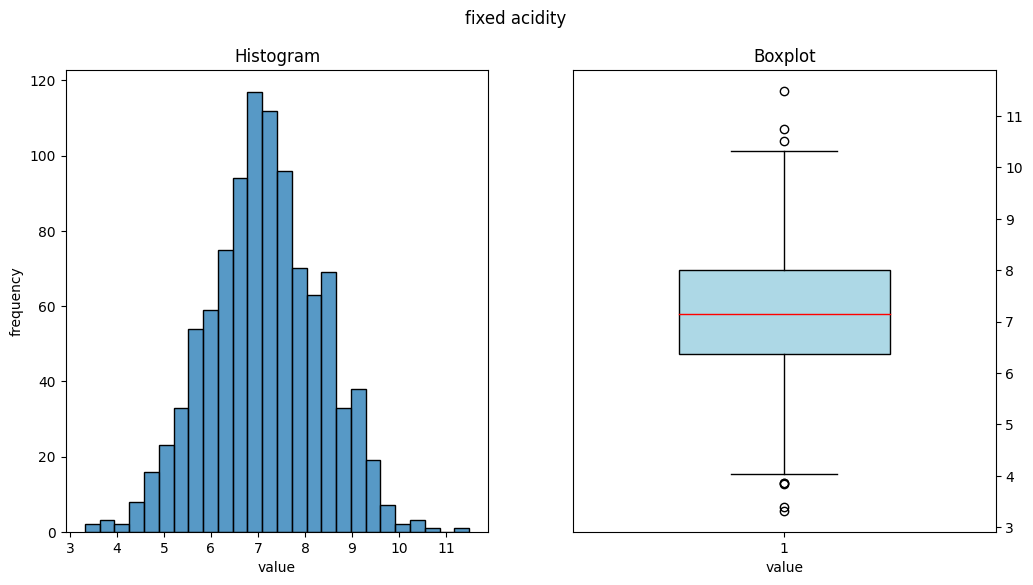

In [4]:
distribution_plot(data['fixed acidity'])

Terlihat pada histogram, distribusi data ***fixed acidity*** terlihat memiliki puncak yang simetris, dan pada boxplot, garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama). Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***normal***.

### 2. Volatile Acidity

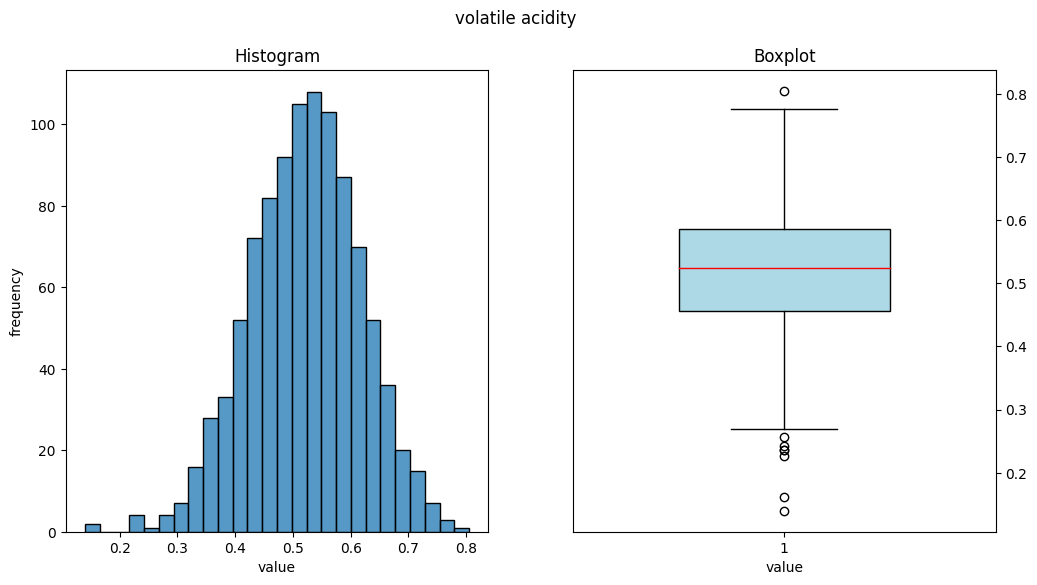

In [5]:
distribution_plot(data['volatile acidity'])

Terlihat pada histogram, distribusi data ***volatile acidity*** terlihat memiliki puncak yang tidak simetris, dan pada boxplot, meskipun garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama), visual tidak menunjukkan kenormalan. Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***tidak normal***.

### 3. Citric Acid

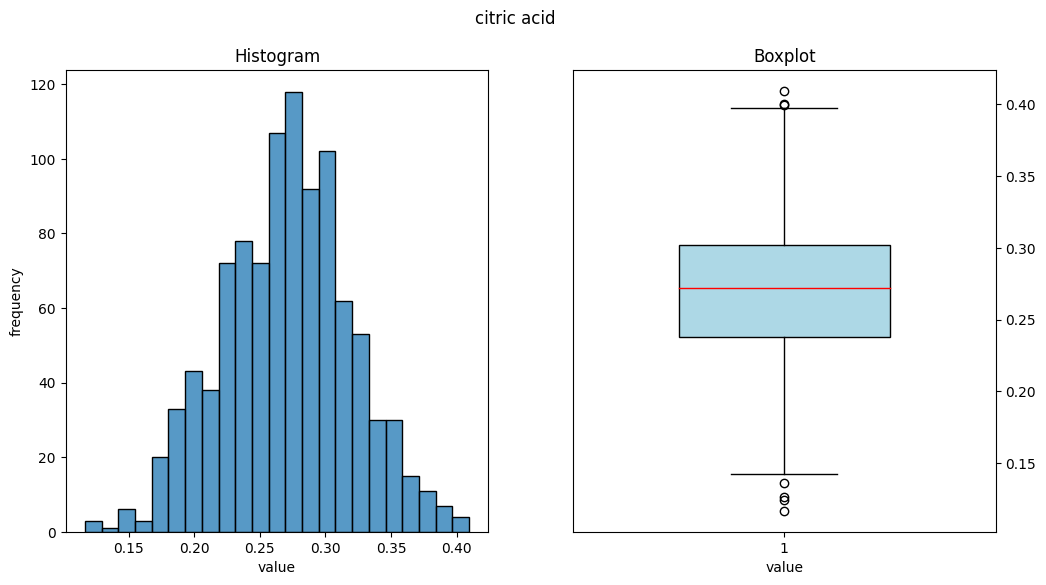

In [6]:
distribution_plot(data['citric acid'])

Terlihat pada histogram, distribusi data ***citric acid*** terlihat memiliki puncak yang simetris, dan pada boxplot, garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama). Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***normal***.

### 4. Residual Sugar

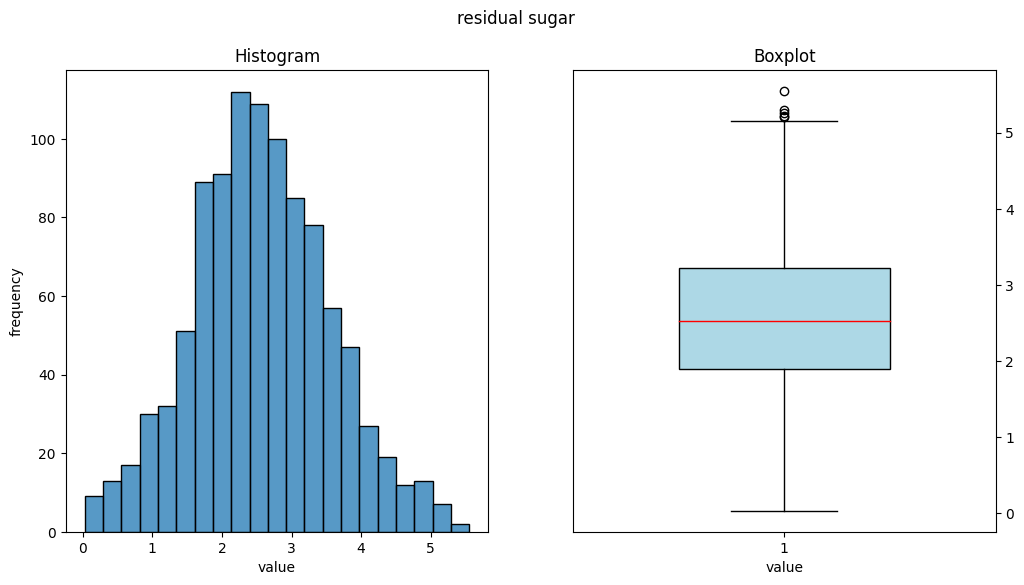

In [7]:
distribution_plot(data['residual sugar'])

Terlihat pada histogram, distribusi data ***residual sugar*** terlihat memiliki puncak yang cukup simetris, dan pada boxplot, garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama). Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***normal***.

### 5. Chlorides

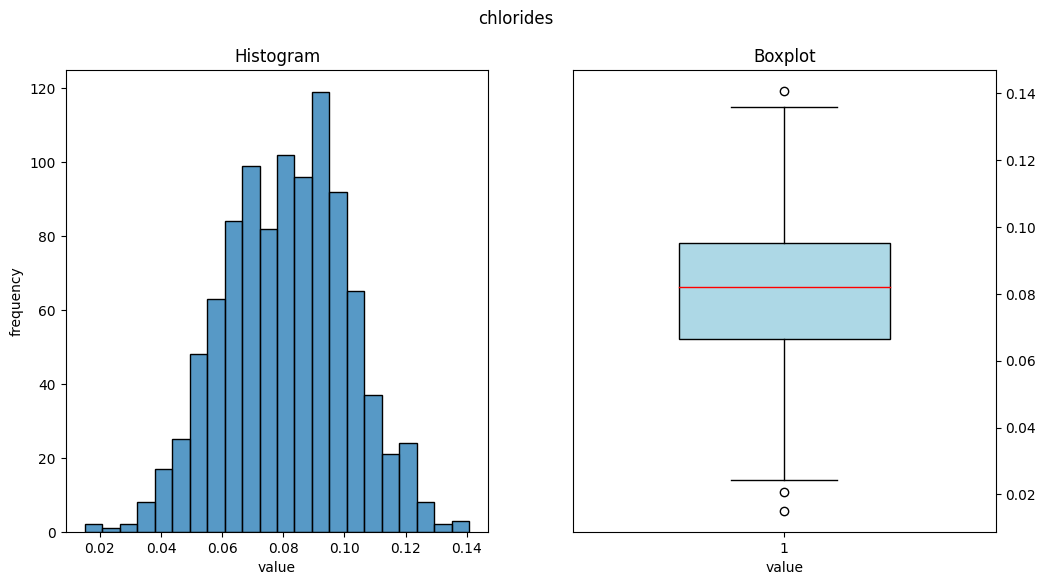

In [8]:
distribution_plot(data['chlorides'])

Terlihat pada histogram, distribusi data ***chlorides*** terlihat memiliki puncak yang cukup simetris, dan pada boxplot, garis median (Q2) berada cukup di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama). Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***normal***.

### 6. Free Sulfur Dioxide

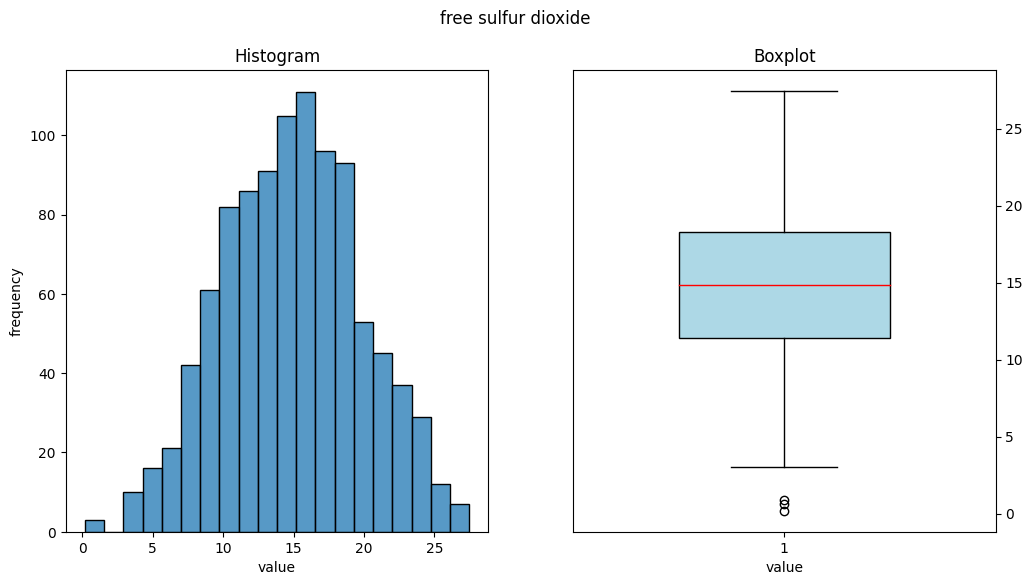

In [9]:
distribution_plot(data['free sulfur dioxide'])

Terlihat pada histogram, distribusi data ***free sulfur dioxide*** memiliki puncak yang tidak simetris, dan pada boxplot, meskipun garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama), secara visual dan outlier yang terbentuk, tidak cukup untuk dikatakan normal. Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***tidak normal***.

### 7. Total Sulfur Dioxide

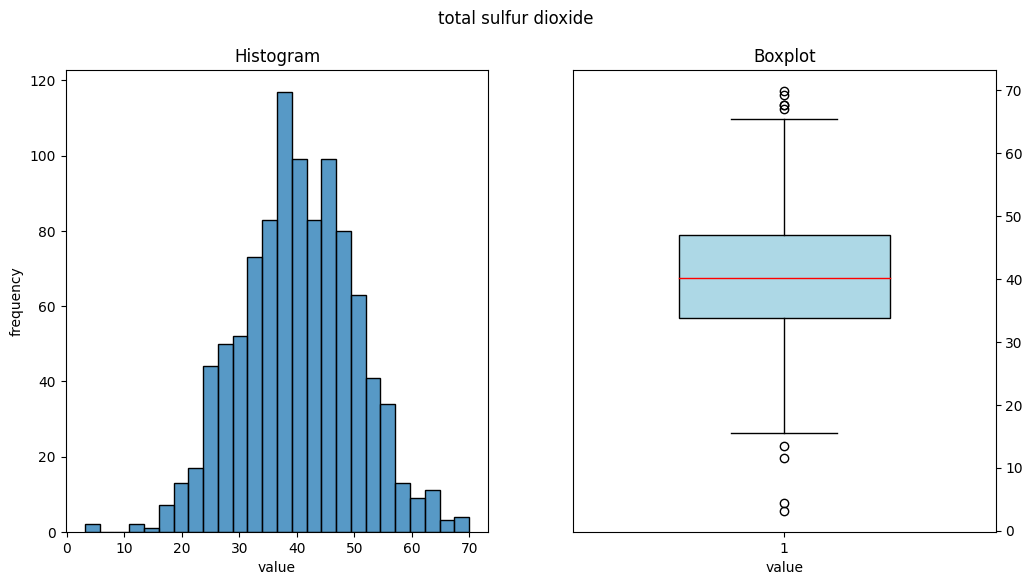

In [10]:
distribution_plot(data['total sulfur dioxide'])

Terlihat pada histogram, distribusi data ***total sulfur dioxide*** terlihat memiliki puncak yang simetris, dan pada boxplot, garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama). Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***normal***.

### 8. Density

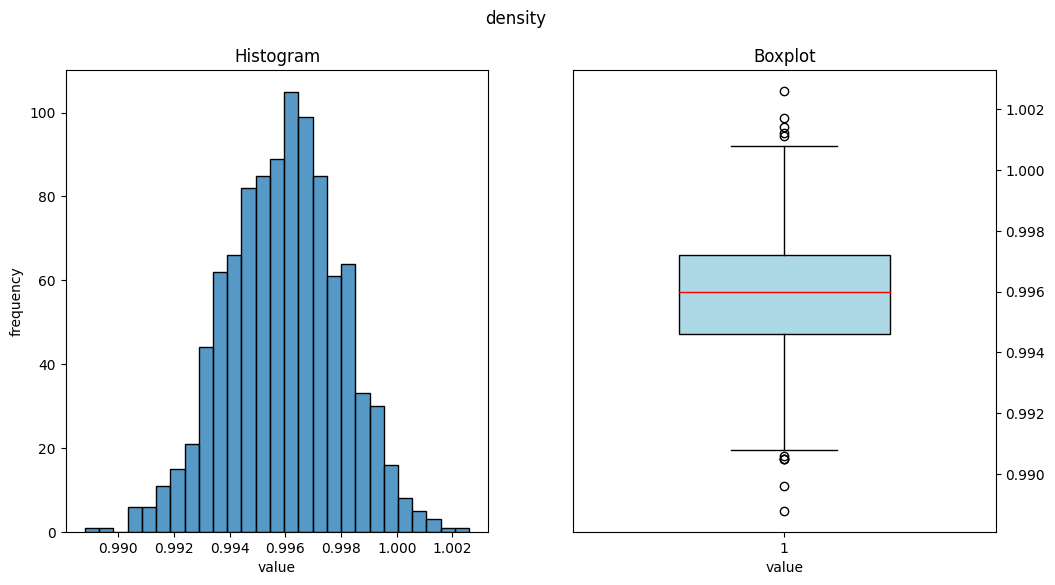

In [11]:
distribution_plot(data['density'])

Terlihat pada histogram, distribusi data ***density*** terlihat memiliki puncak yang simetris, dan pada boxplot, garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama). Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***normal***.

### 9. pH

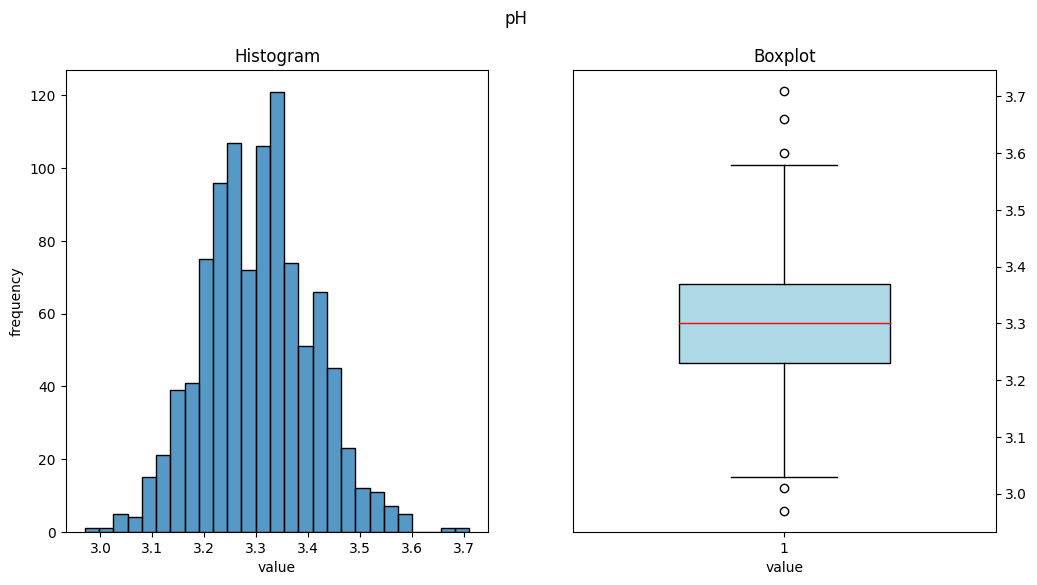

In [12]:
distribution_plot(data['pH'])

Terlihat pada histogram, distribusi data ***pH*** terlihat memiliki puncak yang simetris, dan pada boxplot, garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama). Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***normal***.

### 10. Sulfates

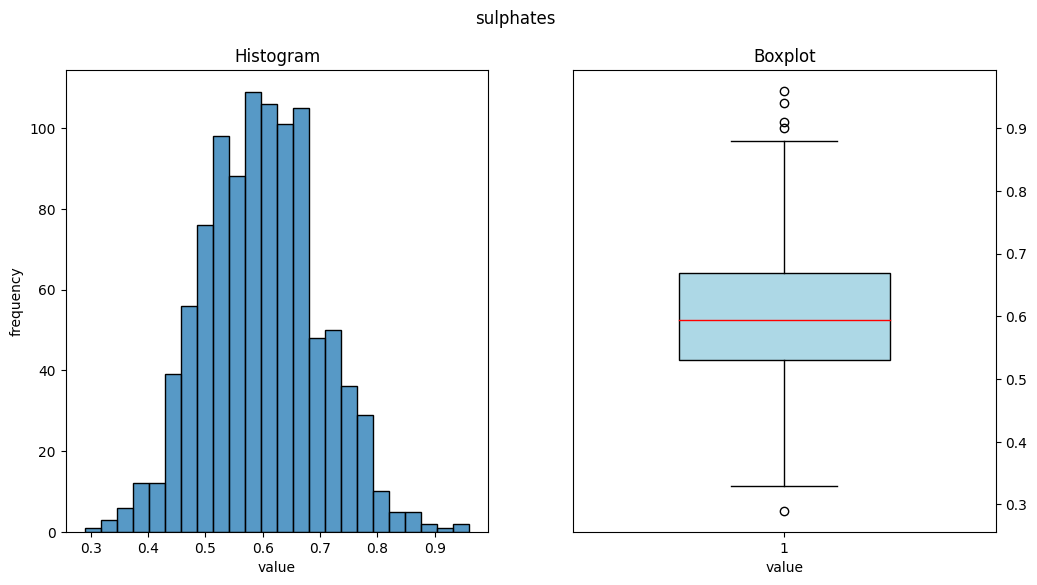

In [13]:
distribution_plot(data['sulphates'])

Terlihat pada histogram, distribusi data ***sulphates*** terlihat memiliki puncak yang simetris, dan pada boxplot, garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama). Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***normal***.

### 11. Alcohol

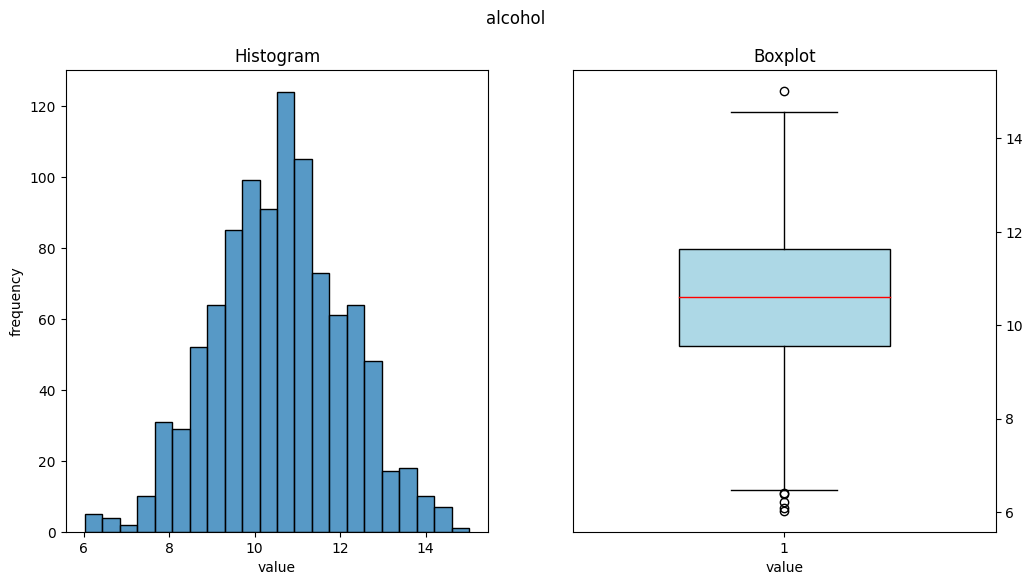

In [14]:
distribution_plot(data['alcohol'])

Terlihat pada histogram, distribusi data ***alcohol*** terlihat memiliki puncak yang simetris, dan pada boxplot, garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama). Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***normal***.

### 12. Quality

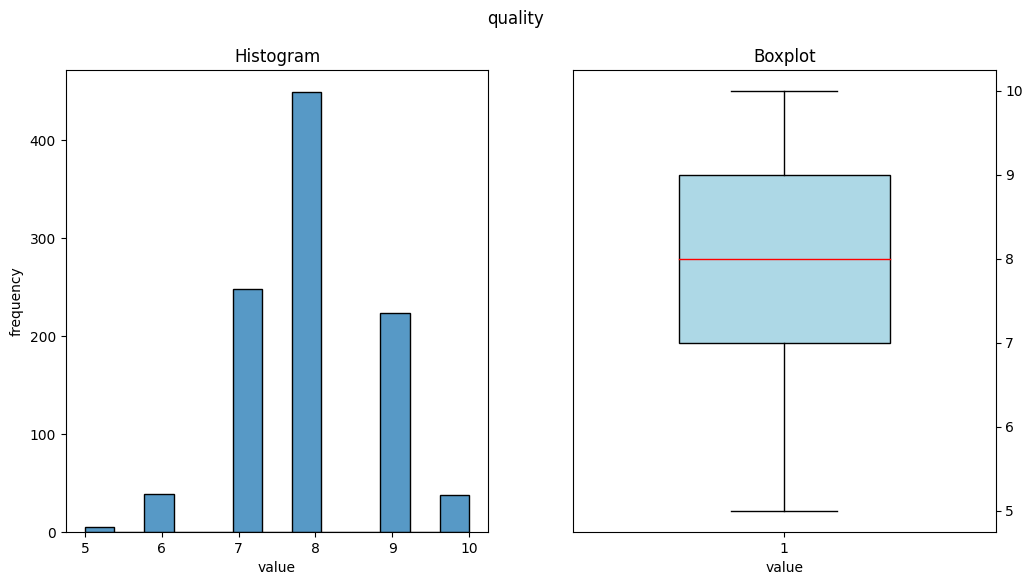

In [15]:
distribution_plot(data['quality'])

Terlihat pada histogram, distribusi data target ***quality*** terlihat memiliki puncak yang simetris, dan pada boxplot, garis median (Q2) berada di tengah IQR (selisih antara kuartil ketiga dan kuartil pertama). Maka dapat disimpulkan bahwa distribusi data cenderung bersifat ***normal***.

# 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak

In [16]:
def normal_distribution_test(atr, alpha=0.05):
    stat, p = normaltest(atr)
    display(Markdown(f'Nilai p = ***{p}***'))
    if p > alpha:
        display(Markdown(f'Data ***{atr.name}*** Terdistribusi Normal'))
    else:
        display(Markdown(f'Data ***{atr.name}*** Tidak Terdistribusi Normal'))
    
    sns.histplot(atr, kde=True)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

Nilai p = ***0.9308584274486692***

Data ***fixed acidity*** Terdistribusi Normal

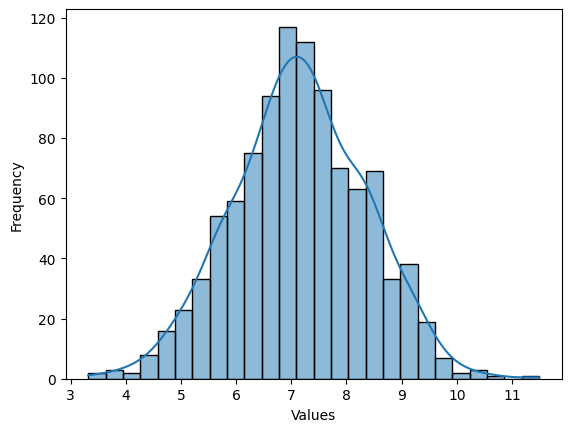

In [17]:
normal_distribution_test(data['fixed acidity'])

Nilai p = ***0.022581461594113835***

Data ***volatile acidity*** Tidak Terdistribusi Normal

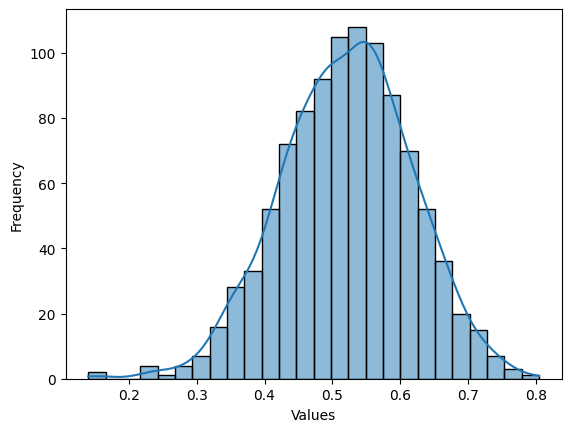

In [18]:
normal_distribution_test(data['volatile acidity'])

Nilai p = ***0.6816899375976969***

Data ***citric acid*** Terdistribusi Normal

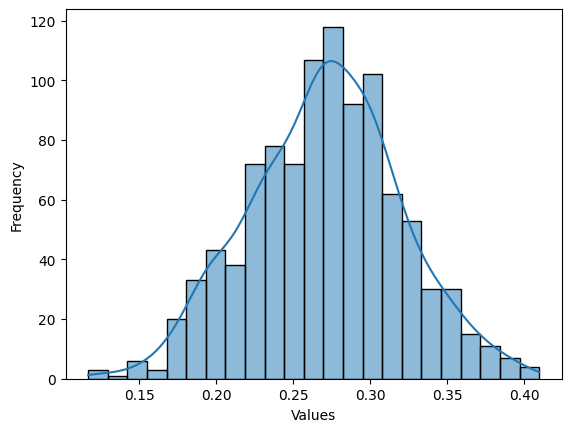

In [19]:
normal_distribution_test(data['citric acid'])

Nilai p = ***0.2246670332131056***

Data ***residual sugar*** Terdistribusi Normal

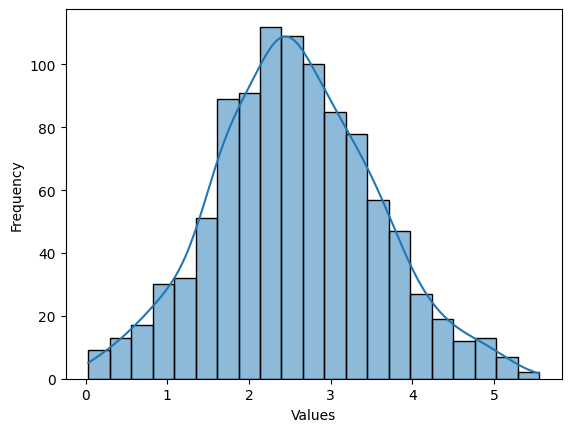

In [20]:
normal_distribution_test(data['residual sugar'])

Nilai p = ***0.17048274704296862***

Data ***chlorides*** Terdistribusi Normal

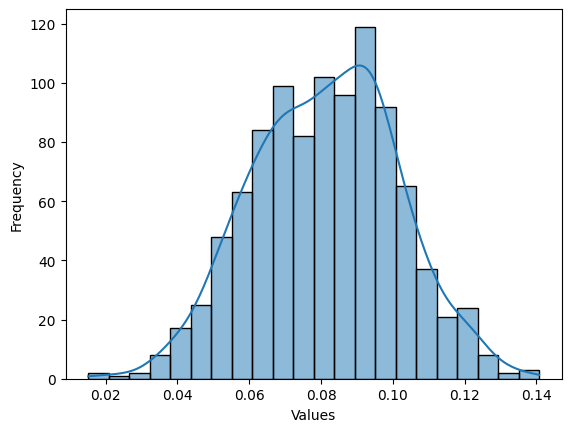

In [21]:
normal_distribution_test(data['chlorides'])

Nilai p = ***0.01743043451827735***

Data ***free sulfur dioxide*** Tidak Terdistribusi Normal

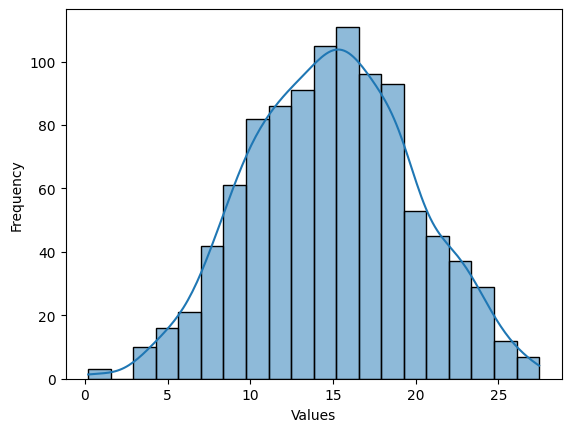

In [22]:
normal_distribution_test(data['free sulfur dioxide'])

Nilai p = ***0.8488846101395726***

Data ***total sulfur dioxide*** Terdistribusi Normal

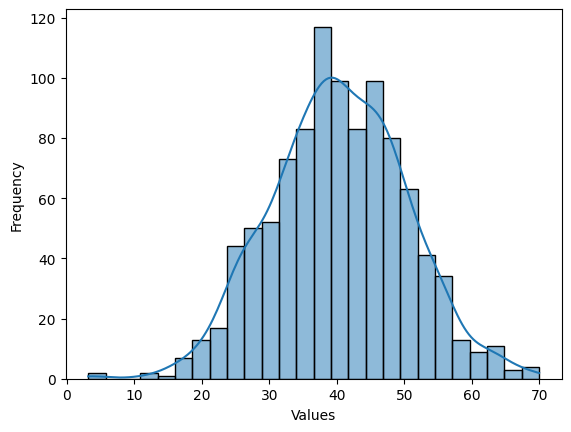

In [23]:
normal_distribution_test(data['total sulfur dioxide'])

Nilai p = ***0.5985227325531981***

Data ***density*** Terdistribusi Normal

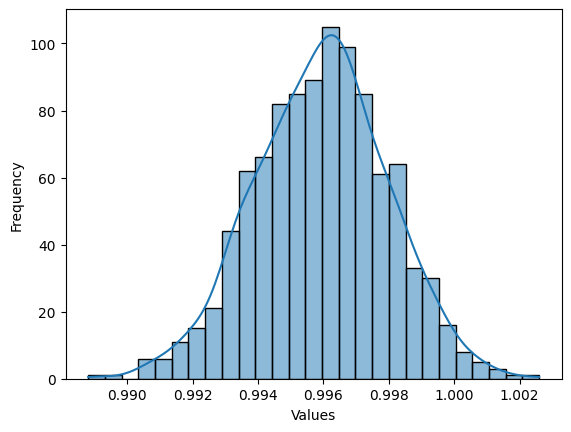

In [24]:
normal_distribution_test(data['density'])

Nilai p = ***0.13678740824860436***

Data ***pH*** Terdistribusi Normal

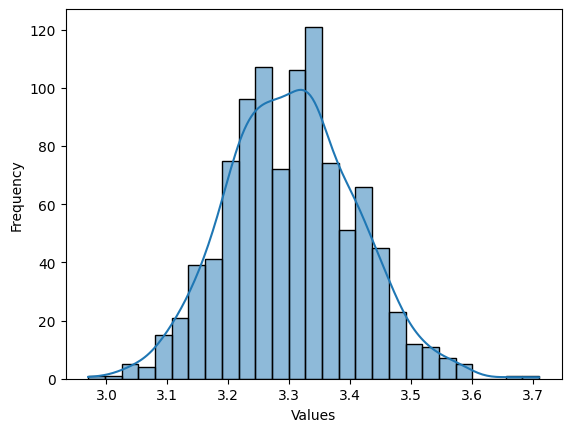

In [25]:
normal_distribution_test(data['pH'])

Nilai p = ***0.13884318628391681***

Data ***sulphates*** Terdistribusi Normal

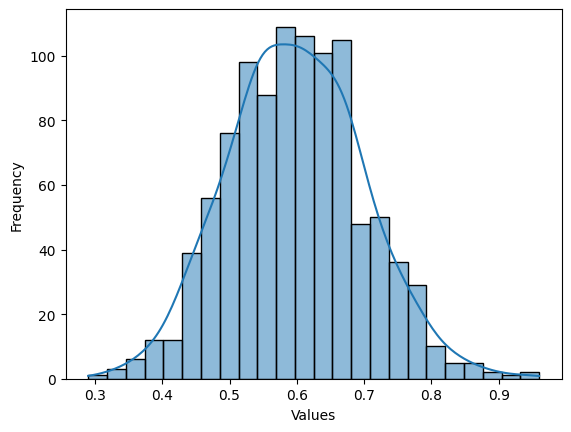

In [26]:
normal_distribution_test(data['sulphates'])

Nilai p = ***0.6790884901361043***

Data ***alcohol*** Terdistribusi Normal

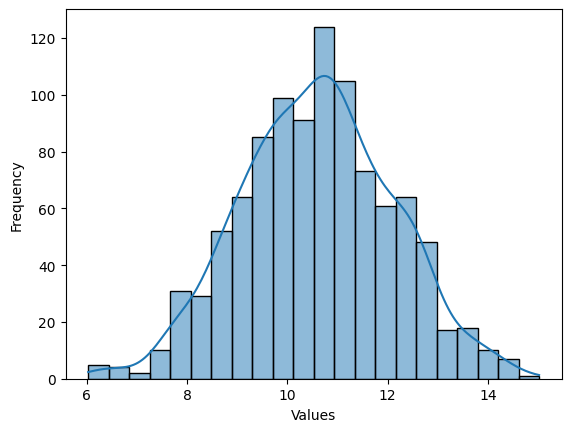

In [27]:
normal_distribution_test(data['alcohol'])

Nilai p = ***0.3888139394184818***

Data ***quality*** Terdistribusi Normal

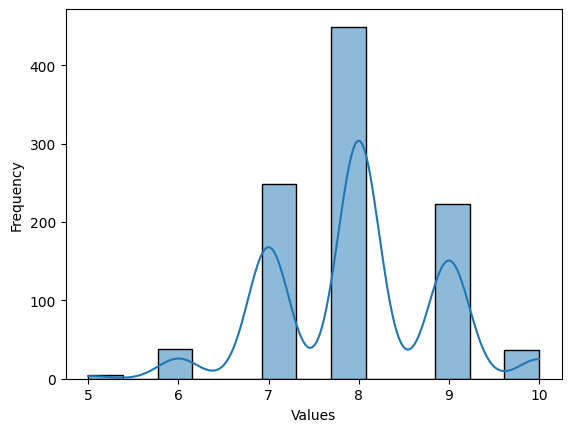

In [28]:
normal_distribution_test(data['quality'])

# 4. Melakukan test hipotesis 1 sampel

### a. Nilai rata-rata pH di atas 3.29?

### Langkah-langkah pengujian:

1. $H_0 : \mu = 3.29$
2. $H_1 : \mu > 3.29$
3. $\alpha = 0.05$
4. Uji statistik menggunakan uji Z karena ukuran data > 30

### Hasil pengujian:

In [29]:
# Inisiasi Variabel
var = 3.29
alpha = 0.05
pH_mean = data['pH'].mean()
pH_std = data['pH'].std()
n = data['pH'].count()

# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha))
Z = (pH_mean - var) / (pH_std / np.sqrt(n))
p_value = norm.sf(abs(Z))

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0:
    print("Z < Z0")
    print("H0 diterima")
else:
    print("Z > Z0")
    print("H0 ditolak")

if p_value > alpha:
    print("p > alpha")
    print("H0 diterima")
else:
    print("p < alpha")
    print("H0 ditolak")


Z = 4.1037807933651145
Z0 = 1.6448536269514722
p_value = 2.0322630043302333e-05
Z > Z0
H0 ditolak
p < alpha
H0 ditolak


$H_0$ ditolak, nilai rata-rata pH diatas 3.29

### b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

### Langkah-langkah pengujian:

1. $H_0 : \mu = 2.50$
2. $H_1 : \mu \neq 2.50$
3. $\alpha = 0.05$
4. Uji statistik menggunakan uji Z karena ukuran data > 30

### Hasil pengujian:

In [30]:
# Inisiasi Variabel
var = 2.5
rs_mean = data['residual sugar'].mean()
rs_std = data['residual sugar'].std()
n = data['residual sugar'].count()

# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha/2)) # /2 karena dua sisi
Z = (rs_mean - var) / (rs_std / np.sqrt(n))
p_value = norm.sf(abs(Z))*2

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0 and Z > -Z0:
    print("Z < Z0 dan Z > -Z0")
    print("H0 diterima")
else:
    print("Z > Z0 atau Z < -Z0")
    print("H0 ditolak")

if p_value > alpha:
    print("p > alpha")
    print("H0 diterima")
else:
    print("p < alpha")
    print("H0 ditolak")

Z = 2.1479619435539523
Z0 = 1.959963984540054
p_value = 0.031716778818727434
Z > Z0 atau Z < -Z0
H0 ditolak
p < alpha
H0 ditolak


$H_0$ ditolak, nilai rata-rata residual sugar tidak sama dengan 2.5

### c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

### Langkah-langkah pengujian:

1. $H_0 : \mu = 0.65$
2. $H_1 : \mu \neq 0.65$
3. $\alpha = 0.05$
4. Uji statistik menggunakan uji Z karena ukuran data > 30

### Hasil pengujian:

In [31]:
# Inisiasi Variabel 
var = 0.65
sulphates_150 = data['sulphates'].head(150)
sulphates_150_mean = sulphates_150.mean()
sulphates_150_std = sulphates_150.std()
n = 150

# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha/2))
Z = (sulphates_150_mean - var) / (sulphates_150_std / np.sqrt(n))
p_value = norm.sf(abs(Z))*2

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0 and Z > -Z0:
    print("Z < Z0 dan Z > -Z0")
    print("H0 diterima")
else:
    print("Z > Z0 atau Z < -Z0")
    print("H0 ditolak")
    
if p_value > alpha:
    print("p > alpha")
    print("H0 diterima")
else:
    print("p < alpha")
    print("H0 ditolak")

Z = -4.964843393315918
Z0 = 1.959963984540054
p_value = 6.875652918327357e-07
Z > Z0 atau Z < -Z0
H0 ditolak
p < alpha
H0 ditolak


$H_0$ ditolak, nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65

### d. Nilai rata-rata total sulfur dioxide di bawah 35?

1. $H_0 : \mu = 35$
2. $H_1 : \mu < 35$
3. $\alpha = 0.05$
4. Uji statistik menggunakan uji Z karena ukuran data > 30

### Hasil pengujian:

In [32]:
# Inisiasi Variabel
var = 35
total_sulfur_dioxide = data['total sulfur dioxide']
total_sulfur_dioxide_mean = total_sulfur_dioxide.mean()
total_sulfur_dioxide_std = total_sulfur_dioxide.std()
n = total_sulfur_dioxide.count()
# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha))
Z = (total_sulfur_dioxide_mean - var) / (total_sulfur_dioxide_std / np.sqrt(n))
p_value = norm.sf(abs(Z))

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")

if Z > Z0:
    print("Z > Z0")
    print("H0 diterima")
else:
    print("Z < Z0")
    print("H0 ditolak")

if p_value > alpha:
    print("p > alpha")
    print("H0 ditolak")
else:
    print("p < alpha")
    print("H0 diterima")

Z = 16.786387372296744
Z0 = 1.6448536269514722
p_value = 1.5348545974086137e-63
Z > Z0
H0 diterima
p < alpha
H0 diterima


$H_0$ diterima, nilai rata-rata total sulfur dioxide tidak dibawah 35

### e. Proporsi nilai Total Sulfur Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

1. $H_0 : p = 0.5 $
2. $H_1 : p \neq 0.5 $
3. $\alpha = 0.05$
4. Uji statistik menggunakan uji Z karena ukuran data > 30

### Hasil pengujian:

In [33]:
# Inisiasi Variabel
total_sulfur_dioxide = data.loc[data['total sulfur dioxide'] > 40, 'total sulfur dioxide']
total_sulfur_dioxide_mean = total_sulfur_dioxide.mean()
total_sulfur_dioxide_std = total_sulfur_dioxide.std()
n = total_sulfur_dioxide.count()
n_all = data['total sulfur dioxide'].count()

# Menggunakan Uji Z karena data > 30
p_count = n / n_all
p_percent = 0.5
q = 1 - p_percent

Z = (p_count - p_percent) / np.sqrt(p_percent*q/n_all)
Z0 = norm.ppf(1 - (alpha/2))

p_value = norm.sf(abs(Z))*2

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0 and Z > -Z0:
    print("Z < Z0 dan Z > -Z0")
    print("H0 diterima")
else:
    print("Z > Z0 atau Z < -Z0")
    print("H0 ditolak")
    
if p_value > alpha:
    print("p > alpha")
    print("H0 diterima")
else:
    print("p < alpha")
    print("H0 ditolak")

Z = 0.7589466384404118
Z0 = 1.959963984540054
p_value = 0.4478844782641115
Z < Z0 dan Z > -Z0
H0 diterima
p > alpha
H0 diterima


$H_0$ diterima, proporsi nilai total sulfur dioxide yang lebih dari 40 sama dengan 50%

# 5. Melakukan test hipotesis 2 sampel

### a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

1. $H_0 : \mu_{awal} - \mu_{akhir} = 0 $
2. $H_1 : \mu_{awal} - \mu_{akhir} \neq 0$
3. $\alpha = 0.05$
4. Uji statistik menggunakan uji Z karena ukuran data > 30

### Hasil pengujian:

In [34]:
# Inisiasi Variabel
fixed_acidity_head = data['fixed acidity'].head(data['fixed acidity'].count()//2)
fixed_acidity_tail = data['fixed acidity'].tail(data['fixed acidity'].count()//2)
head_count = fixed_acidity_head.count()
tail_count = fixed_acidity_tail.count()
head_mean = fixed_acidity_head.mean()
tail_mean = fixed_acidity_tail.mean()
head_std = fixed_acidity_head.std()
tail_std = fixed_acidity_tail.std()
head_variance = fixed_acidity_head.var()
tail_variance = fixed_acidity_tail.var()

# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha/2))
Z = (head_mean - tail_mean) / np.sqrt((head_variance/head_count) + (tail_variance/tail_count))
p_value = norm.sf(abs(Z))*2

print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0 and Z > -Z0:
    print("Z < Z0 dan Z > -Z0")
    print("H0 diterima")
else:
    print("Z > Z0 atau Z < -Z0")
    print("H0 ditolak")

if p_value > alpha:
    print("p > alpha")
    print("H0 diterima")
else:
    print("p < alpha")
    print("H0 ditolak")

Z = 0.02604106999906379
Z0 = 1.959963984540054
p_value = 0.9792245804254097
Z < Z0 dan Z > -Z0
H0 diterima
p > alpha
H0 diterima


$H_0$ diterima, rata-rata bagian awal dan bagian akhir fixed acidity sama

### b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

1. $H_0 : \mu_{awal} - \mu_{akhir} = 0.001 $
2. $H_1 : \mu_{awal} - \mu_{akhir} \neq 0.001$
3. $\alpha = 0.05$
4. Uji statistik menggunakan uji Z karena ukuran data > 30

### Hasil pengujian:

In [35]:
# H0 : mean_awal = mean_akhir + 0.001
# H1 : mean_awal != mean_akhir + 0.001

# Inisiasi Variabel
delta = 0.001
chloride_head = data['chlorides'].head(data['chlorides'].count()//2)
chloride_tail = data['chlorides'].tail(data['chlorides'].count()//2)
head_count = chloride_head.count()
tail_count = chloride_tail.count()
head_mean = chloride_head.mean()
tail_mean = chloride_tail.mean()
chlorides_std = data['chlorides'].std()

# Menggunakan Uji Z karena data > 30
Z0 = norm.ppf(1 - (alpha/2)) # /2 karena dua sisi
Z = (head_mean - tail_mean - delta) / (chlorides_std / np.sqrt(n//2))
p_value = norm.sf(abs(Z))*2

# Hasil Akhir
print(f"Z = {Z}")
print(f"Z0 = {Z0}")
print(f"p_value = {p_value}")
if Z < Z0 and Z > -Z0:
    print("Z < Z0 dan Z > -Z0")
    print("H0 diterima")
else:
    print("Z > Z0 atau Z < -Z0")
    print("H0 ditolak")

if p_value > alpha:
    print("p > alpha")
    print("H0 diterima")
else:
    print("p < alpha")
    print("H0 ditolak")


Z = -0.4731044883927298
Z0 = 1.959963984540054
p_value = 0.6361386347409888
Z < Z0 dan Z > -Z0
H0 diterima
p > alpha
H0 diterima


$H_0$ diterima, rata-rata bagian awal kolom chlorides lebih besar 0.001 dibanding rata-rata bagian akhirnya

### c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?

1. $H_0 : \mu_{va} - \mu_s = 0 $
2. $H_1 : \mu_{va} - \mu_s \neq 0$
3. $\alpha = 0.05$
4. Uji statistik menggunakan uji t karena ukuran data $\leq$ 30

### Hasil pengujian:

In [36]:
# Inisiasi Variabel
volatile_acidity_head = data['volatile acidity'].head(25)
volatile_acidity_head_count = volatile_acidity_head.count()
volatile_acidity_head_mean = volatile_acidity_head.mean()
volatile_acidity_head_std = volatile_acidity_head.std()
volatile_acidity_head_variance = volatile_acidity_head.var()

sulphates_head = data['sulphates'].head(25)
sulphates_head_count = sulphates_head.count()
sulphates_head_mean = sulphates_head.mean()
sulphates_head_std = sulphates_head.std()
sulphates_head_variance = sulphates_head.var()

# Menggunakan Uji t karena data < 30
dk = volatile_acidity_head_count + sulphates_head_count - 2
t0 = t.ppf(1 - alpha/2, dk)
t_uji = (volatile_acidity_head_mean - sulphates_head_mean) / (np.sqrt((volatile_acidity_head_variance*(volatile_acidity_head_count-1) + sulphates_head_variance*(sulphates_head_count-1))/dk) * np.sqrt((1/volatile_acidity_head_count) + (1/sulphates_head_count)))
p_value = t.sf(abs(t_uji), dk) * 2

print(f"t0 = {t0}")
print(f"t = {t_uji}")
print(f"p_value = {p_value}")
if t_uji < t0 and t_uji > -t0:
    print("t < t0 dan t > -t0")
    print("H0 diterima")
else:
    print("t > t0 atau t < -t0")
    print("H0 ditolak")

if p_value > alpha:
    print("p > alpha")
    print("H0 diterima")
else:
    print("p < alpha")
    print("H0 ditolak")

t0 = 2.0106347546964454
t = -2.6374821676748703
p_value = 0.011223058174680032
t > t0 atau t < -t0
H0 ditolak
p < alpha
H0 ditolak


$H_0$ ditolak, rata-rata 25 baris pertama kolom volatile acidity tidak sama dengan rata-rata 25 baris pertama kolom sulphates

### d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

1. $H_0 : \sigma^2_{awal} - \sigma^2_{akhir} = 0 $
2. $H_1 : \sigma^2_{awal} - \sigma^2_{akhir} \neq 0$
3. $\alpha = 0.05$
4. Uji statistik menggunakan uji f karena yang akan diuji adalah variansi

### Hasil pengujian:

In [37]:
# Inisiasi Variabel
residual_sugar_head = data['residual sugar'].head(data['residual sugar'].count()//2)
residual_sugar_tail = data['residual sugar'].tail(data['residual sugar'].count()//2)
head_count = residual_sugar_head.count()
tail_count = residual_sugar_tail.count()
head_mean = residual_sugar_head.mean()
tail_mean = residual_sugar_tail.mean()
head_std = residual_sugar_head.std()
tail_std = residual_sugar_tail.std()
head_variance = residual_sugar_head.var()
tail_variance = residual_sugar_tail.var()
head_dk = head_count - 1
tail_dk = tail_count - 1

# Menggunakan uji f
Falpha = f.ppf(q=1-alpha/2, dfn=head_dk, dfd=tail_dk)
F1minalpha = f.ppf(q=alpha/2, dfn=head_dk, dfd=tail_dk)
F = head_variance/tail_variance

print(f"F(alpha){head_dk, tail_dk} = {Falpha}")
print(f"F(1-alpha){head_dk, tail_dk} = {F1minalpha}")
print(f"f = {F}")

# Hasil Akhir
if F > F1minalpha and F < Falpha:
    print(f"F > F(1-alpha){head_dk, tail_dk} dan F < F(alpha){head_dk, tail_dk}")
    print("H0 diterima")
else:
    print(f"F < F(1-alpha){head_dk, tail_dk} atau F > F(alpha){head_dk, tail_dk}")
    print("H0 ditolak")



F(alpha)(499, 499) = 1.1920574017201653
F(1-alpha)(499, 499) = 0.8388857772763105
f = 0.9420041066941615
F > F(1-alpha)(499, 499) dan F < F(alpha)(499, 499)
H0 diterima


$H_0$ diterima, variansi bagian awal kolom residual sugar sama dengan variansi bagian akhirnya

### e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

1. $H_0 : p_{awal} - p_{akhir} = 0 $
2. $H_1 : p_{awal} - p_{akhir} > 0$
3. $\alpha = 0.05$
4. Uji statistik menggunakan uji Z karena ukuran data > 30

### Hasil pengujian:

In [38]:
# Inisiasi Variabel
alcohol_awal = data.head(500).loc[data['alcohol'] > 7, 'alcohol']
alcohol_mean_awal = alcohol_awal.mean()
alcohol_std_awal = alcohol_awal.std()
n_awal = alcohol_awal.count()
n_all_awal = data['alcohol'].head(500).count()

alcohol_akhir = data.tail(500).loc[data['alcohol'] > 7, 'alcohol']
alcohol_mean_akhir = alcohol_akhir.mean()
alcohol_std_akhir = alcohol_akhir.std()
n_akhir = alcohol_akhir.count()
n_all_akhir = data['alcohol'].tail(500).count()

# Menggunakan Uji Z karena data > 30
p_awal = n_awal/n_all_awal
p_akhir = n_akhir/n_all_akhir
p = (n_awal+n_akhir)/(n_all_awal+n_all_akhir)
q = 1-p
Z = (p_awal - p_akhir)/(np.sqrt(p * q * (1/n_all_awal + 1/n_all_akhir)))
p_value = norm.sf(abs(Z))
print(f"Z = {Z}")
print(f'nilai p = {p_value}')
if(p_value > alpha):
    print("p > alpha")
    print("H0 diterima")
else:
    print("p < alpha")
    print("H0 ditolak")

Z = 0.0
nilai p = 0.5
p > alpha
H0 diterima


$H_0$ diterima, proporsi nilai lebih dari 7 pada setengah bagian awal alcohol sama dengan proporsi nilai lebih dari 7 pada setengah bagian akhirnya

# Table

In [39]:
df = pd.DataFrame(data)

# print the DataFrame as a table
print(df)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             5.90            0.4451       0.1813        2.049401   0.070574   
1             8.40            0.5768       0.2099        3.109590   0.101681   
2             7.54            0.5918       0.3248        3.673744   0.072416   
3             5.39            0.4201       0.3131        3.371815   0.072755   
4             6.51            0.5675       0.1940        4.404723   0.066379   
..             ...               ...          ...             ...        ...   
995           7.96            0.6046       0.2662        1.592048   0.057555   
996           8.48            0.4080       0.2227        0.681955   0.051627   
997           6.11            0.4841       0.3720        2.377267   0.042806   
998           7.76            0.3590       0.3208        4.294486   0.098276   
999           5.87            0.5214       0.1883        2.179490   0.052923   

     free sulfur dioxide  total sulfur 